# Import Library

In [13]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import zipfile

# Load Dataset

## Load MNIST

In [14]:
from tensorflow.keras.datasets import mnist

In [15]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [16]:
# Memeriksa ukuran data latih dan data uji
(train_data.shape, test_data.shape)

((60000, 28, 28), (10000, 28, 28))

In [17]:
# Memeriksa ukuran label latih dan label uji
(train_labels.shape, test_labels.shape)

((60000,), (10000,))

In [18]:
# Memeriksa setiap ukuran data
train_data[0].shape

(28, 28)

In [19]:
# Memeriksa ukuran label latih
train_labels.shape

(60000,)

### Combine Train and Test Data

In [20]:
digits_data = np.vstack([train_data, test_data]) # Menggabungkan train_data dengan test_data secara vertikal
digits_labels = np.hstack([train_labels, test_labels]) # Menggabungkan train_data dengan test   _data secara horizontal

In [21]:
# Memeriksa ukuran digits_data
digits_data.shape

(70000, 28, 28)

In [22]:
# Memeriksa ukuran digits_labels
digits_labels.shape

(70000,)

Text(0.5, 1.0, 'Class: 2')

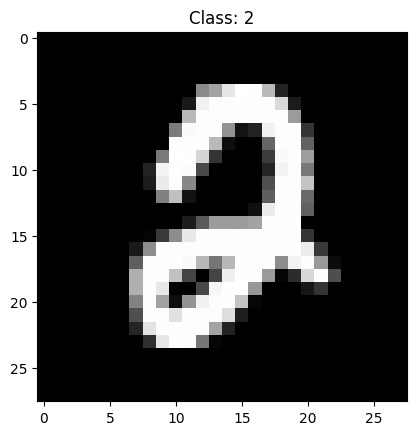

In [23]:
idx = np.random.randint(0, digits_data.shape[0]) # Menghasilkan indeks acak dari data digit.
plt.imshow(digits_data[idx], cmap='gray') # Menampilkan gambar dari data digit pada indeks acak.
plt.title('Class: ' + str(digits_labels[idx]))

<Axes: xlabel='Labels', ylabel='count'>

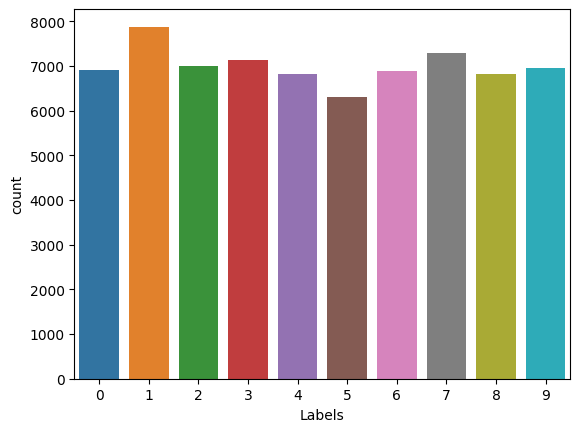

In [24]:
# Check data distribution
df_labels = pd.DataFrame(digits_labels, columns=['Labels']) # Membuat DataFrame dari label digit.
sns.countplot(df_labels, x='Labels') # Membuat plot hitungan untuk distribusi label.

## Load Kaggle A-Z

In [25]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip # Mengunduh file zip yang berisi data alfabet.

--2023-12-05 02:32:43--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M   280MB/s    in 0.7s    

2023-12-05 02:32:44 (280 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [26]:
# Extract zip file
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r') # Membuka file zip yang diunduh.
zip_object.extractall('./') # Mengekstrak file zip ke direktori saat ini.
zip_object.close()

In [27]:
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32') # Membaca file CSV dari file zip yang diekstrak dan mengubah tipe datanya menjadi ‘float32’.
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Mengambil data piksel saja dari dataset.
alphabet_data = dataset_az.drop('0', axis=1)
# Mengambil label saja dari dataset.
alphabet_labels = dataset_az['0']

In [29]:
# Check shape data
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [30]:
# Check shape labels
alphabet_labels.shape

(372450,)

In [31]:
# Mengubah bentuk data piksel menjadi 28x28.
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
# Check the result by its shape
alphabet_data.shape

(372450, 28, 28)

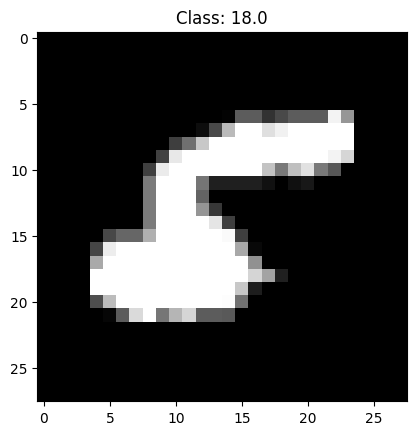

In [32]:
# Randomly checking A-Z dataset
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = 'gray')
plt.title('Class: ' + str(alphabet_labels[index]));

<Axes: xlabel='Labels', ylabel='count'>

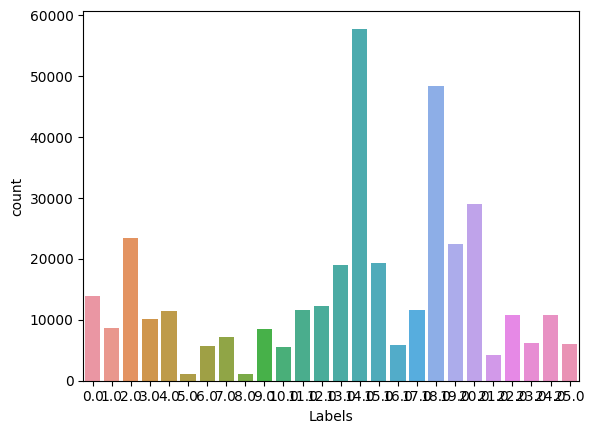

In [33]:
# Cek data distribution
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})
sns.countplot(df_az_labels, x='Labels')

## Combine Dataset (MNIST + Kaggel A-Z)

In [34]:
# Cek unique value dari digits_labels
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [35]:
# Cek unique value dari alphabet_labels
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [36]:
alphabet_labels += 10 # Menambahkan 10 ke setiap label alfabet agar tidak bertabrakan dengan label digit.

In [37]:
# check alphabet labels again
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [38]:
# Combine both of them
data = np.vstack([alphabet_data, digits_data]) # Menggabungkan data alfabet dan digit secara vertikal.
labels = np.hstack([alphabet_labels, digits_labels]) # Menggabungkan label alfabet dan digit secara horizontal.

In [39]:
# Check the shape
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [40]:
# Check labels
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [41]:
# Convert data to float32
data = np.array(data, dtype = 'float32') # Mengubah data menjadi array numpy dengan tipe data ‘float32’.

In [42]:
data = np.expand_dims(data, axis=-1) # Menambahkan dimensi kedalaman ke data untuk digunakan dalam model Convolutional Neural Network (CNN).

# check shape
data.shape

(442450, 28, 28, 1)

# Preprocessing

In [43]:
# Normalisasi data
data /= 255.0

In [44]:
# Memeriksa nilai minimum dan maksimum dari data pertama dalam array data.
data[0].min(), data[0].max()

(0.0, 1.0)

In [45]:
le = LabelBinarizer() # Membuat objek LabelBinarizer, yang mirip dengan OneHotEncoder.
labels = le.fit_transform(labels) # Mengubah label menjadi bentuk biner menggunakan LabelBinarizer.

In [46]:
# Check labels shape
labels.shape

(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

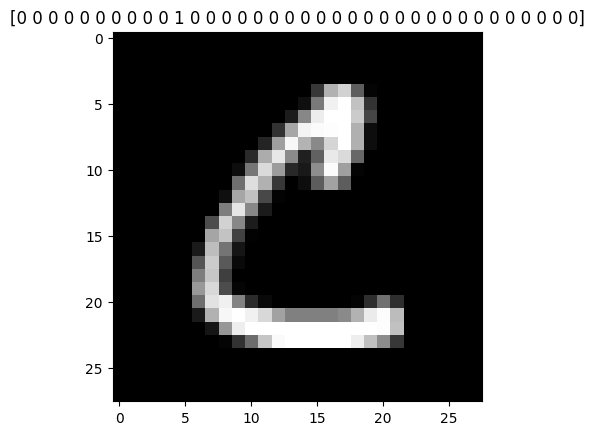

In [47]:
plt.imshow(data[30000].reshape(28,28), cmap='gray') # Menampilkan gambar dari data ke-30000
plt.title(str(labels[0]))

In [48]:
classes_total = labels.sum(axis = 0) # Menghitung jumlah total dari setiap kelas dalam label.
classes_total # Membuat dictionary kosong untuk menyimpan bobot kelas

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [49]:
# Cek value terbesar dari data
classes_total.max()

57825

In [50]:
# Membuat dictionary kosong untuk menyimpan bobot kelas.
classes_weights = {}
for i in range(0, len(classes_total)): # Looping melalui setiap kelas.
  
  classes_weights[i] = classes_total.max() / classes_total[i] # Menghitung bobot untuk setiap kelas dengan membagi jumlah maksimum kelas dengan jumlah kelas saat ini.

# Cek weight pada setiap data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

# Split Data to Train and Test

In [51]:
# Membagi data dan label menjadi set latihan dan pengujian dengan ukuran pengujian 20% dari total data. 
# Stratifikasi digunakan untuk memastikan distribusi kelas yang sama antara set latihan dan pengujian.
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

## Create Data Augmentation

In [52]:
# Import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [53]:
# Membuat objek generator gambar untuk augmentasi data, yang dapat menghasilkan variasi gambar melalui rotasi, zoom, dan pergeseran.
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

# Build CNN Model

In [54]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [55]:
# Membuat model Sequential keras, yang merupakan tumpukan linear lapisan.
network = Sequential()

#Menambahkan lapisan ke model, termasuk lapisan Conv2D untuk konvolusi, MaxPool2D untuk pooling, Flatten untuk meratakan input, dan Dense untuk lapisan sepenuhnya terhubung.
network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

network.add(Dense(36, activation='softmax'))

# Mengonfigurasi proses pembelajaran model dengan menentukan fungsi kerugian, optimizer, dan metrik.
network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [56]:
# Cek network summary
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [57]:
# Membuat label aktual untuk kelas.
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# Check actual label
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


## Train model

In [58]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model'
epochs = 20
batch_size = 128

In [59]:
# Membuat titik kontrol untuk menyimpan model dengan kerugian validasi terendah.
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [60]:
# Melatih model menggunakan data latihan, dengan data pengujian sebagai set validasi. 
# Augmentasi data diterapkan pada data latihan, dan bobot kelas digunakan untuk menangani ketidakseimbangan kelas.
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/20
2764/2765 [============================>.] - ETA: 0s - loss: 2.2528 - accuracy: 0.8219
Epoch 1: val_loss improved from inf to 0.26018, saving model to custom_ocr.model
2765/2765 [==============================] - 137s 46ms/step - loss: 2.2524 - accuracy: 0.8219 - val_loss: 0.2602 - val_accuracy: 0.8868
Epoch 2/20
2764/2765 [============================>.] - ETA: 0s - loss: 1.0141 - accuracy: 0.8986
Epoch 2: val_loss did not improve from 0.26018
2765/2765 [==============================] - 113s 41ms/step - loss: 1.0141 - accuracy: 0.8986 - val_loss: 0.2750 - val_accuracy: 0.8885
Epoch 3/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.8421 - accuracy: 0.9120
Epoch 3: val_loss did not improve from 0.26018
2765/2765 [==============================] - 123s 45ms/step - loss: 0.8419 - accuracy: 0.9120 - val_loss: 0.2893 - val_accuracy: 0.8813
Epoch 4/20
2765/2765 [==============================] - ETA: 0s - loss: 0.7377 - accuracy: 0.9196
Epoch 4: val_loss improve

# Evaluate Model

## Make a Single Prediction

In [61]:
# Membuat prediksi pada set pengujian menggunakan model yang telah dilatih.
predictions = network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 2s 2ms/step


In [62]:
predictions[1]

array([1.1708216e-25, 1.5483789e-14, 2.7810533e-17, 1.2631174e-27,
       2.9546223e-21, 7.3090202e-14, 2.5907413e-19, 2.7629469e-19,
       7.9862572e-19, 1.2353575e-23, 2.0592859e-21, 4.2981161e-20,
       6.9264227e-17, 1.1001132e-15, 5.4333772e-17, 6.7780000e-20,
       6.0883206e-17, 6.8992393e-23, 9.9999976e-01, 2.3296198e-07,
       1.4998659e-16, 2.1582647e-14, 1.8437854e-21, 2.1754222e-20,
       6.3369413e-17, 2.8584696e-20, 7.5968864e-26, 7.8411633e-22,
       1.5268423e-16, 4.5914816e-10, 1.1878586e-17, 2.1838808e-25,
       4.9220786e-22, 3.9926357e-17, 1.7328392e-14, 1.3944145e-13],
      dtype=float32)

In [63]:
# Mengambil indeks dengan probabilitas tertinggi dari prediksi pertama sebagai prediksi sebenarnya.
np.argmax(predictions[1])

18

In [64]:
# Check label for 24
name_labels[18]

'I'

In [65]:
# Check y_test label for 0
y_test[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [66]:
# check the highest value
np.argmax(y_test[1])

18

In [67]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[18])]

'S'

## Make an Evaluation on Test Data

In [68]:
# Menilai kinerja model pada set pengujian.
network.evaluate(X_test, y_test)

2766/2766 [==============================] - 9s 3ms/step - loss: 0.1852 - accuracy: 0.9334


[0.18515965342521667, 0.9334161877632141]

In [69]:
# Mencetak laporan klasifikasi yang menunjukkan metrik kinerja model seperti presisi, recall, dan F1-score.
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.33      0.75      0.46      1381
           1       0.96      0.99      0.98      1575
           2       0.85      0.99      0.91      1398
           3       0.91      0.99      0.95      1428
           4       0.89      0.98      0.93      1365
           5       0.48      0.97      0.64      1263
           6       0.96      0.97      0.97      1375
           7       0.94      0.99      0.96      1459
           8       0.91      0.99      0.95      1365
           9       0.97      0.98      0.97      1392
           A       1.00      0.98      0.99      2774
           B       0.97      0.99      0.98      1734
           C       0.99      0.97      0.98      4682
           D       0.84      0.98      0.90      2027
           E       1.00      0.99      0.99      2288
           F       0.96      1.00      0.98       233
           G       0.96      0.93      0.95      1152
           H       0.99    

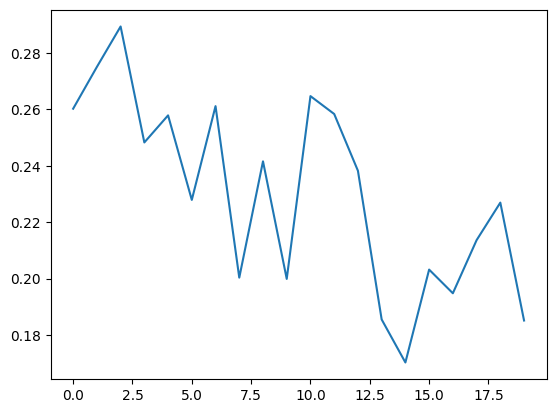

In [70]:
# Membuat plot dari nilai kerugian validasi untuk setiap epoch selama pelatihan.
plt.plot(history.history['val_loss'])

In [71]:
# You can also check the another metrics
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

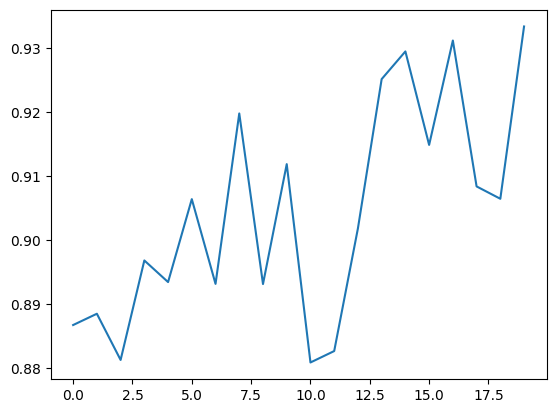

In [72]:
# Membuat plot dari akurasi validasi untuk setiap epoch selama pelatihan.
plt.plot(history.history['val_accuracy'])

# Save The Model

In [73]:
# Menyimpan model yang telah dilatih dalam format h5.
network.save('network', save_format= 'h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing on Real Image

In [74]:
# Import library
from tensorflow.keras.models import load_model

In [75]:
# Memuat model yang telah disimpan.
load_network = load_model('network')

In [80]:
# Check summary
load_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [81]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


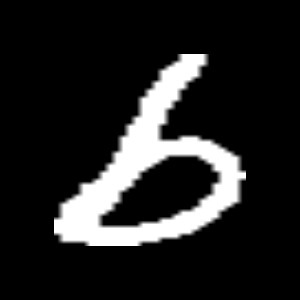

In [84]:
# Load Image
import cv2
from google.colab.patches import cv2_imshow

# Membaca gambar dari Google Drive.
img = cv2.imread('/content/drive/MyDrive/Machine_Learning/b_small.jpg')
cv2_imshow(img)

In [85]:
# Check shape
img.shape

(300, 300, 3)

In [86]:
# Mengubah gambar menjadi grayscale.
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# check shape
gray_img.shape

(300, 300)

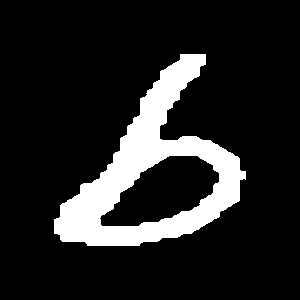

120.0


In [87]:
# Menerapkan ambang batas biner dan Otsu pada gambar grayscale.
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(thresh)

# print threshold value
print(value)

In [88]:
# Mengubah ukuran gambar menjadi 28x28.
img_resize = cv2.resize(gray_img, (28,28))
cv2_imshow(img_resize)

In [89]:
# Mengubah tipe data gambar menjadi float32 dan melakukan normalisasi.
img_input = img_resize.astype('float32') / 255 # also perform normalization
img_input = np.expand_dims(img_input, axis=-1) # Menambahkan dimensi kedalaman ke gambar.

# check shape
img_input.shape

(28, 28, 1)

In [90]:
# Mengubah bentuk gambar untuk memasukkan jumlah data sebagai dimensi.
img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape

(1, 28, 28, 1)

In [91]:
# Membuat prediksi pada gambar menggunakan model yang telah dilatih.
prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) # Mengambil indeks dengan probabilitas tertinggi dari prediksi sebagai prediksi sebenarnya.
pred_label

1/1 [==============================] - 0s 156ms/step


6

In [92]:
# check label untuk 6
name_labels[6]

'6'

# Analisis Singkat

Model CNN yang sudah dilatih tersebut memiliki akurasi tinggi, tetapi hasil prediksi yang diberikan masih belum tepat. Hal ini terjadi karena adanya kemiripan antara 'b' dengan '6' yang mengakibatkan hasil prediksi menjadi kurang tepat. Jadi, model memerlukan data baru untuk mencegah kekeliruan prediksi selanjutnya